# Solve the problems statement made in part 1 using a stock optimizer

1. Begin by importing data and libraries. Define starting and ending points

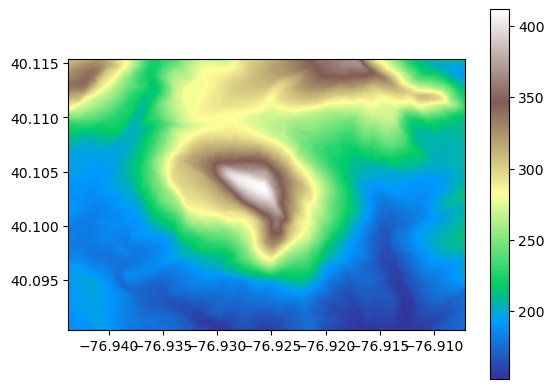

starting index: (2835, 2271)
ending index: (1335, 1483)

Start Location: (40.09047158688756, -76.91653014622179, 152.42)
End Location: (40.10366175255552, -76.92595521393523, 411.659)


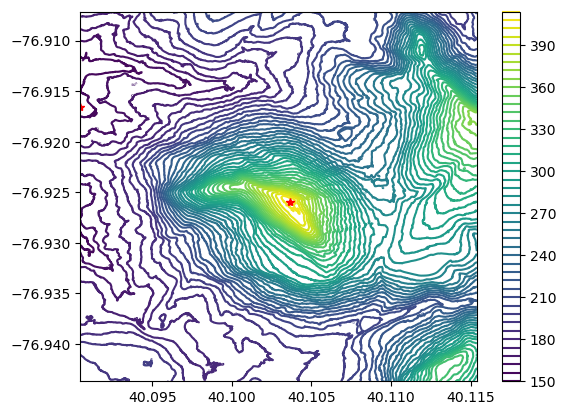

In [1]:
import numpy as np
from scipy import optimize as opt
from matplotlib import pyplot as plt

import little_roundtop_mountain_data_and_plot.import_tar_file_extract_tif as tar
import little_roundtop_mountain_data_and_plot.extract_and_plot_lat_lon_elevation_data as elv #Contains lat/lon/elevation/transorm/minXY/maxXY

get_max_index = lambda x: np.unravel_index(np.argmax(x), x.shape)   #Finds index of max value
get_min_index = lambda x: np.unravel_index(np.argmin(x), x.shape)   #Finds index of min value

start_point  = get_min_index(elv.elevation)
end_point = get_max_index(elv.elevation)

print(f"starting index: {start_point}")
print(f"ending index: {end_point}\n")

# For a given index tuple, return lat/lon/elevation
def get_location(point):
    
    x_indx = point[0]
    y_indx = point[1]

    return elv.lat[x_indx][y_indx], elv.lon[x_indx][y_indx], elv.elevation[x_indx][y_indx]

# Define a function to estimate elevation at a given point
def get_elevation(lat, lon):
    # Map the input latitude and longitude to the indices of the elevation array
    i = int(np.interp(lat, (elv.minY, elv.maxY), (elv.elevation.shape[0]-1, 0)))
    j = int(np.interp(lon, (elv.minX, elv.maxX), (0, elv.elevation.shape[1]-1)))
    # Use bilinear interpolation to estimate the elevation at the given point
    x1, x2 = lon, lon+ elv.transform[0]
    y1, y2 = lat, lat+ elv.ransform[4]
    q11, q21 = elv.elevation[i,j], elv.elevation[i,j+1]
    q12, q22 = elv.elevation[i+1,j], elv.elevation[i+1,j+1]
    elevation_at_point = ((q11 * (x2 - lon) * (y2 - lat) + 
                            q21 * (lon - x1) * (y2 - lat) + 
                            q12 * (x2 - lon) * (lat - y1) + 
                            q22 * (lon - x1) * (lat - y1)) / ((x2 - x1) * (y2 - y1)))
    return elevation_at_point    

start_loc = get_location(start_point)
end_loc = get_location(end_point)


print(f"Start Location: {start_loc}")
print(f"End Location: {end_loc}")
plt.figure(1)
plt.contour(elv.lat, elv.lon, elv.elevation,50)
plt.plot(start_loc[0],start_loc[1], '*r')
plt.plot(end_loc[0], end_loc[1], "r*")
plt.colorbar()

2. Then define constraint functions and objective functions

3. Plug into stock optimizer and print results

4. Extract Metrics and Iterate